In [1]:
# Zeta Disease Case-Take Home Challenge

In [2]:
# Importing Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [3]:
zeta_disease_df=pd.read_csv(r'C:\Users\NAVEEN ARORA\Take Home Challenge\Data Sets\zeta_train.csv')

In [4]:
# Check head of the data

In [5]:
zeta_disease_df.head()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,54,189,27.1,80,0,1.5038,0,10,0
1,23,150,38.5,68,71,0.3868,55,2,0
2,47,186,29.9,90,0,0.2728,0,7,0
3,18,150,30.8,70,1033,0.6598,56,0,0
4,24,160,32.4,74,125,0.7608,59,2,0


In [6]:
# Check Tail of the Data

In [7]:
zeta_disease_df.tail()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
795,26,161,28.4,90,78,0.5578,42,3,0
796,37,165,33.7,60,0,0.3078,69,6,1
797,27,166,25.6,74,0,0.2638,0,5,0
798,109,139,28.1,66,94,0.2298,53,1,0
799,26,196,29.7,56,0,0.6268,0,1,0


In [8]:
# Check info of the data

In [9]:
zeta_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
age                   800 non-null int64
weight                800 non-null int64
bmi                   800 non-null float64
blood_pressure        800 non-null int64
insulin_test          800 non-null int64
liver_stress_test     800 non-null float64
cardio_stress_test    800 non-null int64
years_smoking         800 non-null int64
zeta_disease          800 non-null int64
dtypes: float64(2), int64(7)
memory usage: 56.3 KB


In [10]:
# No issues with data types of variables. 
# Every variable has 800 values,so no missing values. 
# All are continous variables as there type is int64 or float 64
# No One Hot Encoding (OHE) Required in this Dataset

In [11]:
zeta_disease_df.describe()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,30.985000,172.407500,32.201625,69.565000,85.887500,0.544496,43.121250,4.051250,0.348750
std,13.824025,31.942438,8.549155,19.874784,126.333656,0.348711,30.409949,4.176173,0.476873
min,18.000000,94.000000,0.000000,0.000000,0.000000,0.140800,0.000000,0.000000,0.000000
25%,21.000000,149.000000,27.300000,62.000000,0.000000,0.307800,0.000000,1.000000,0.000000
50%,26.000000,167.000000,32.050000,72.000000,45.000000,0.445300,53.000000,3.000000,0.000000
75%,38.000000,192.000000,36.525000,80.000000,130.000000,0.699800,62.000000,6.000000,1.000000
max,109.000000,308.000000,86.100000,157.000000,1077.000000,3.481300,214.000000,40.000000,1.000000


In [12]:
# Find count of data that has the Zeta disease and that does not

In [13]:
zeta_disease_df.zeta_disease.value_counts()

0    521
1    279
Name: zeta_disease, dtype: int64

In [14]:
# So out of 800 observations, 521(65%) have no Zeta disease and 279 (35%) has Zeta disease

In [15]:
# For building the model, zeta_disease will be the dependent variable (Y) and remaining variables will be
# the independent variables(X)

In [16]:
# Creating a list of all independent variables for future use

zeta_x_features= list(zeta_disease_df.columns)
zeta_x_features.remove ('zeta_disease')
zeta_x_features

['age',
 'weight',
 'bmi',
 'blood_pressure',
 'insulin_test',
 'liver_stress_test',
 'cardio_stress_test',
 'years_smoking']

In [17]:
# Conducting Exploratory Data Analysis

In [18]:
list(zeta_disease_df.columns)

['age',
 'weight',
 'bmi',
 'blood_pressure',
 'insulin_test',
 'liver_stress_test',
 'cardio_stress_test',
 'years_smoking',
 'zeta_disease']

Text(0.5, 0, 'age')

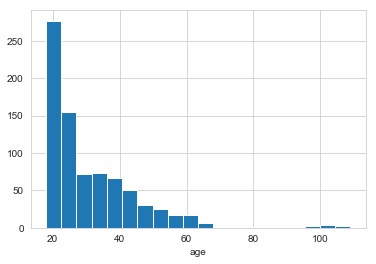

In [19]:
sns.set_style('whitegrid')
zeta_disease_df['age'].hist(bins=20)
plt.xlabel('age')


In [20]:
# It can be inferred that most cases are in lower ages. As age increases, the disease is less. Data is most right skewed

In [21]:
# Creating a Distribution Plot

C:\Users\NAVEEN ARORA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


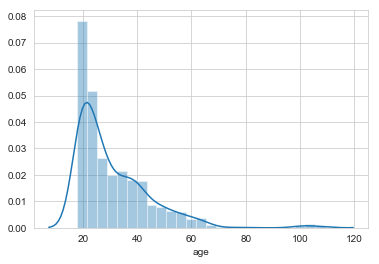

In [22]:
sns.distplot(zeta_disease_df['age']);

In [23]:
# Creating a pair plot

C:\Users\NAVEEN ARORA\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\NAVEEN ARORA\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\NAVEEN ARORA\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


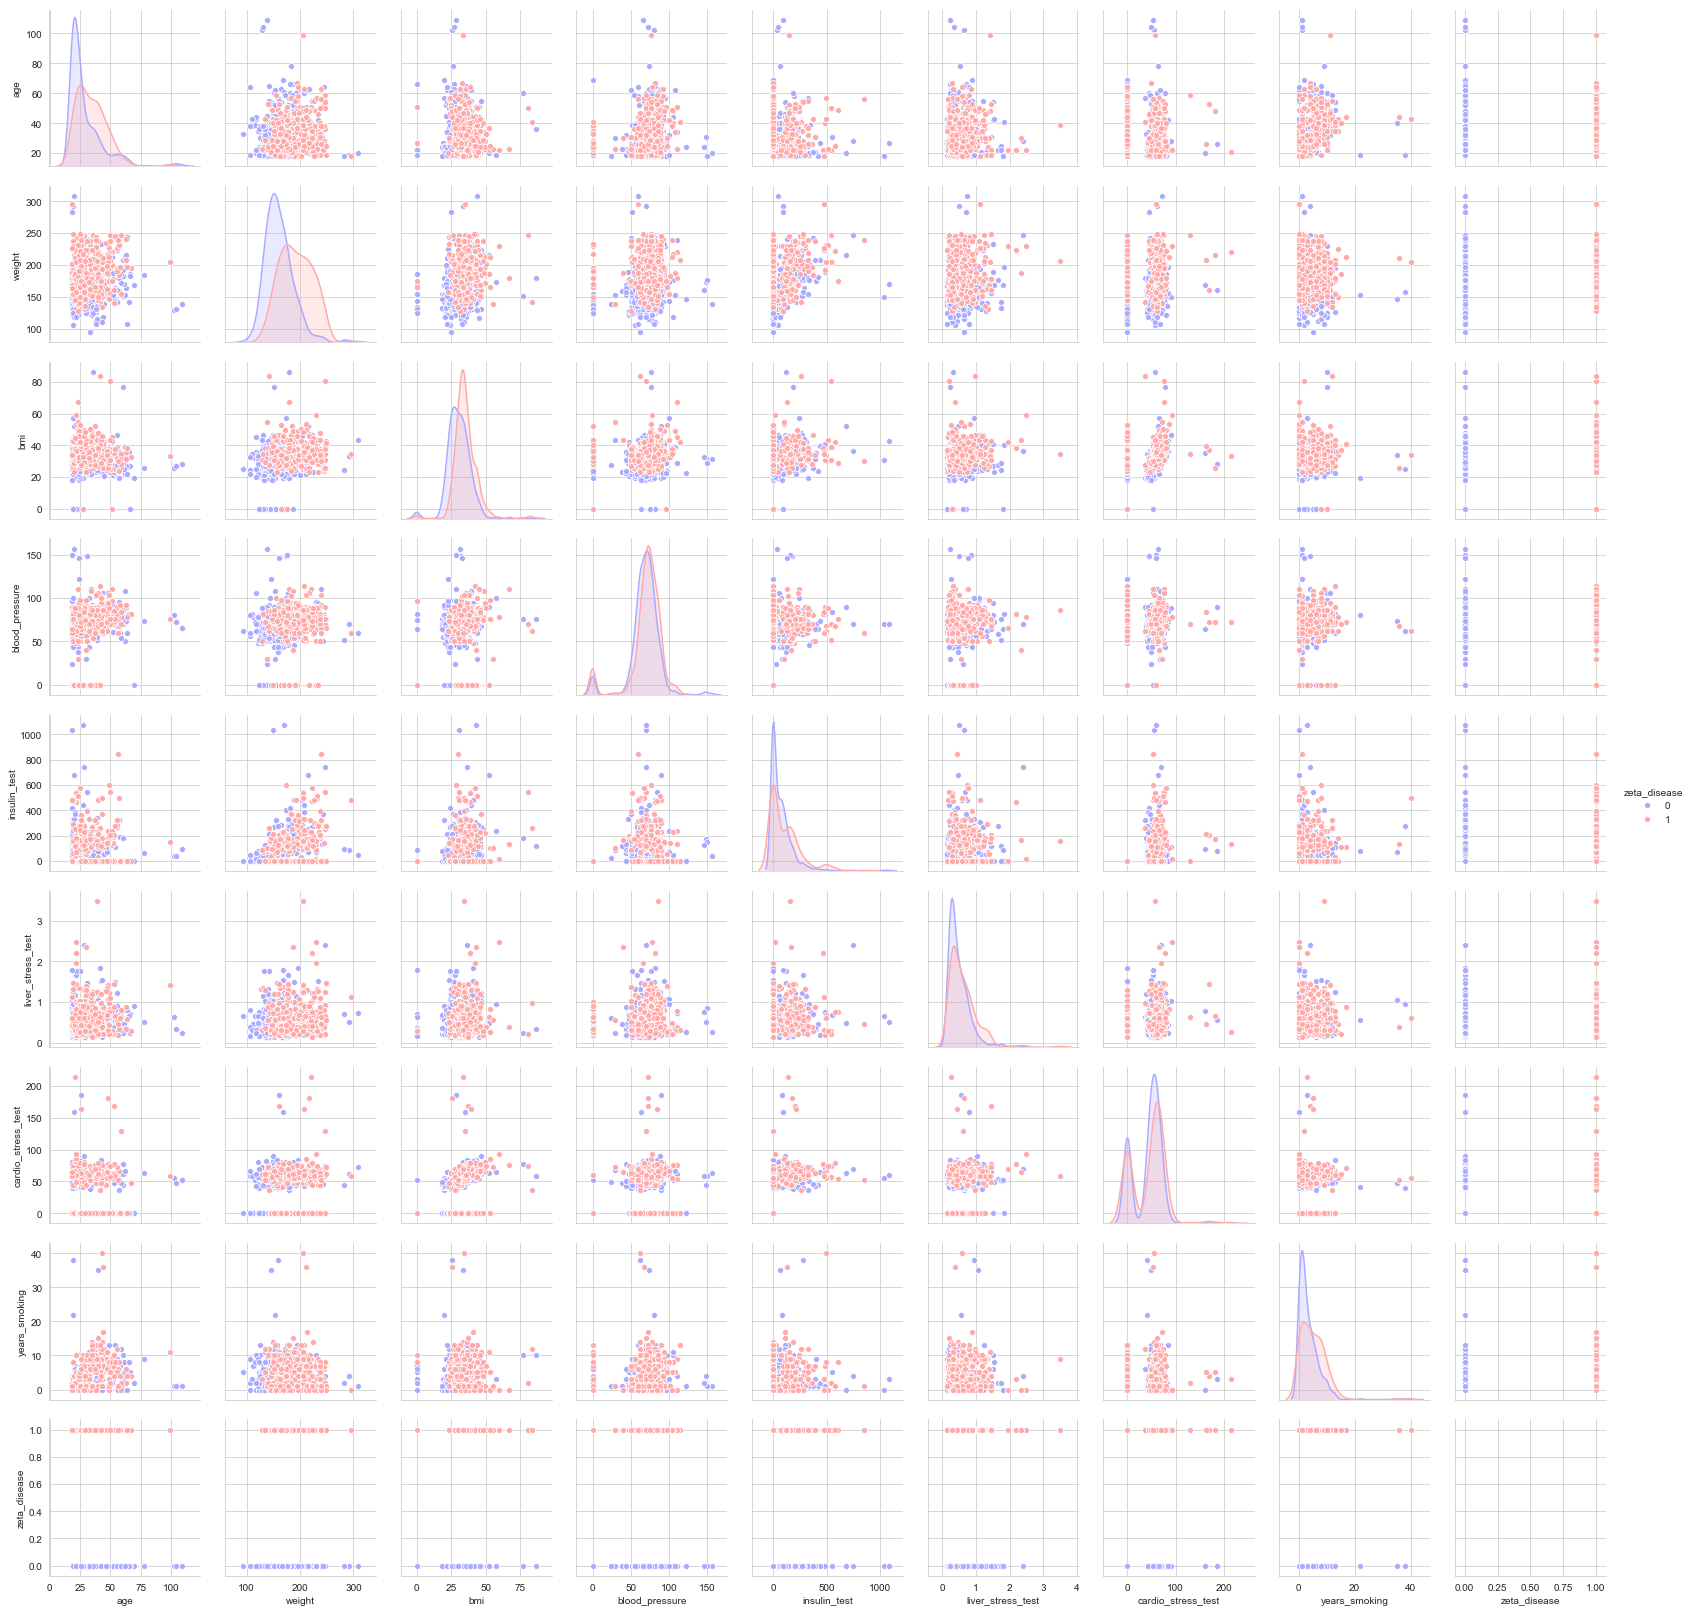

In [24]:
sns.pairplot(zeta_disease_df,hue='zeta_disease',palette='bwr')

In [25]:
# Since the Classification for Zeta Disease is Either 1 or 0 (Categorical), we will be Building Logistic Regression Model 
# for this Case.

In [26]:
# We will be splitting Data in to Train and Test Data for building the Model and Validation 
# We will be using 70-30 Split for Train and test

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = zeta_disease_df[['age', 'weight','bmi','blood_pressure','insulin_test','liver_stress_test','cardio_stress_test','years_smoking']]
y = zeta_disease_df['zeta_disease']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
# Now we will train and fit a logistic regression model on the training set

In [35]:
import statsmodels.api as sm 

logit=sm.Logit(y_train, X_train)
zeta_logit_model=logit.fit()

Optimization terminated successfully.
         Current function value: 0.624960
         Iterations 5


In [36]:
zeta_logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:               Logit            Pseudo R-squared: 0.043     
Dependent Variable:  zeta_disease     AIC:              715.9549  
Date:                2021-02-26 19:47 BIC:              750.5784  
No. Observations:    560              Log-Likelihood:   -349.98   
Df Model:            7                LL-Null:          -365.57   
Df Residuals:        552              LLR p-value:      5.7591e-05
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      5.0000                                       
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
age                -0.0054   0.0078 -0.6936 0.4880 -0.0206  0.0099
weight              0.0034   0.0023  1.4503 0.1470 -0.0012  0.0079
bmi                 0.0098   0.0116  0.8494 0.3957 -0.0129  0.0325
blood_pressure     -0.0245   0.0051 -4.8049 0.0000 -0.0345 -0.0145
insulin_test        0.0011   0.0008  1.4990 0.1339 -0.0003  0.0026
liver_stress_test   0.2701   0.2785  0.9697 0.3322 -0.2758  0.8160
cardio_stress_test -0.0047   0.0034 -1.3784 0.1681 -0.0113  0.0020
years_smoking       0.1200   0.0299  4.0129 0.0001  0.0614  0.1786
==================================================================

"""

In [37]:
# Now we will be performing Model Diagnostics in order to Validate the Logistic Regression Model 
# and goodness of fit before it can be used.

# Below measures are generally used for validating the Logistic Regression
#1. Walds test
#2. Likelihood ratio test (LLR p-value reported in output)
# 3. Pseudo RSquare

In [38]:
# The model summary above suggests that only 2 features are statistically significant (blood_pressure and years_smoking)
# at a significance value of Alpha =0.05 as p values are less than 0.05. p value for Likelihood ratio test (LLR p-value)
# is almost 0.00 which indicates that the model is statistically significant.


In [39]:
# We can also define a method to get significant variables with p values less than 0.05

In [40]:
def get_significant_vars (lm):
    # Store p values and corresponding column names in a dataframe
    var_p_vals_df=pd.DataFrame (lm.pvalues)
    var_p_vals_df['vars']=var_p_vals_df.index
    var_p_vals_df.columns=['pvals','vars']
    # Filter the column names where p value is less than 0.05
    return list(var_p_vals_df[var_p_vals_df.pvals<=0.05]['vars'])


In [41]:
significant_vars= get_significant_vars(zeta_logit_model)

In [42]:
significant_vars

['blood_pressure', 'years_smoking']

In [43]:
# So from above we conclde that only blood_pressure and years_smoking are the Significant variables. 

# Now we can build a Logistic Regression model with only significant variables and drop the remaining variables.

In [44]:
zeta_final_logit=sm.Logit(y_train, sm.add_constant(X_train[significant_vars])).fit()

Optimization terminated successfully.
         Current function value: 0.620392
         Iterations 5


In [45]:
zeta_final_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.050     
Dependent Variable: zeta_disease     AIC:              700.8388  
Date:               2021-02-26 19:49 BIC:              713.8226  
No. Observations:   560              Log-Likelihood:   -347.42   
Df Model:           2                LL-Null:          -365.57   
Df Residuals:       557              LLR p-value:      1.3132e-08
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             -1.4001   0.3370 -4.1542 0.0000 -2.0607 -0.7395
blood_pressure     0.0033   0.0045  0.7253 0.4683 -0.0056  0.0121
years_smoking      0.1461   0.0268  5.4469 0.0000  0.0935  0.1987
=================================================================

"""

In [46]:
# The coeff are positive for variables blood pressure and years smoking which means that the prob of zeta disease increases as
# the value of these variables increases. 

In [47]:
# After building the model, we will be predicting on Test Data

In [48]:
y_pred_df=pd.DataFrame({'actual': y_test,'predicted_prob':zeta_final_logit.predict(sm.add_constant(X_test[significant_vars]))})

In [49]:
# Printing few test samples

y_pred_df.sample(15, random_state=42)

,actual,predicted_prob
360,0,0.235542
346,0,0.317524
393,1,0.612089
367,0,0.355981
76,0,0.286738
133,0,0.257810
292,1,0.635603
786,0,0.320371
456,1,0.241494
218,0,0.297580


In [50]:
# To understand how many observations the model has classified correctly and how many are not,
# we will assume a cut-off prob of 0.50 
# All observations with pred prob of more than 0.5 will be predicted as having zeta disease(1) and 
# less than 0.5 not having zeta disease(0)

In [51]:
y_pred_df['predicted']=y_pred_df.predicted_prob.map(lambda x:1 if x>0.50 else 0)

In [52]:
y_pred_df.sample(15, random_state=42)

,actual,predicted_prob,predicted
360,0,0.235542,0
346,0,0.317524,0
393,1,0.612089,1
367,0,0.355981,0
76,0,0.286738,0
133,0,0.257810,0
292,1,0.635603,1
786,0,0.320371,0
456,1,0.241494,0
218,0,0.297580,0


In [53]:
# From above sample it is observed that there are some observations where it has wrongly predicted. 
# Lets create Confusion Matrix

In [54]:
# Confusion Matrix

In [56]:
from sklearn import metrics
def draw_cm(actual, predicted):
    cm=metrics.confusion_matrix(actual, predicted,[1,0])
    sns.heatmap(cm, annot=True, fmt='.2f', 
                xticklabels=["Zeta Disease", "No Zeta Disease"], yticklabels=["Zeta Disease", "No Zeta Disease"])
    plt.ylabel('True label')
    plt.xlabel('Predict label')
    plt.show()

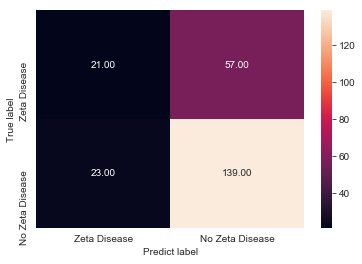

In [57]:
draw_cm(y_pred_df.actual,y_pred_df.predicted)

In [58]:
# Measuring Accuracies

# Sensitivity or Recall (True Positive Rate)
#Specificity or True Negative Rate
# Precision
# F-score

In [59]:
print (metrics. classification_report(y_pred_df.actual, y_pred_df.predicted))

              precision    recall  f1-score   support

           0       0.71      0.86      0.78       162
           1       0.48      0.27      0.34        78

   micro avg       0.67      0.67      0.67       240
   macro avg       0.59      0.56      0.56       240
weighted avg       0.63      0.67      0.64       240



In [60]:
# After checking the Recall and Precision values for Y=0 (No Zeta Disease),the model is very good. 
# However it is not very good in identifying Y=1 (Zeta Disease) as the Recall value is less. 
# This is the result for cut off probability of 0.5%. This can be improved by choosing the 
# right cut off probability.

In [61]:
# We can plot the distributions of predicted prob values for Zeta Disease and No Zeta Disease to undertsand how well the 
# model can distinguish Zeta Disease from No Zeta Disease.

C:\Users\NAVEEN ARORA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


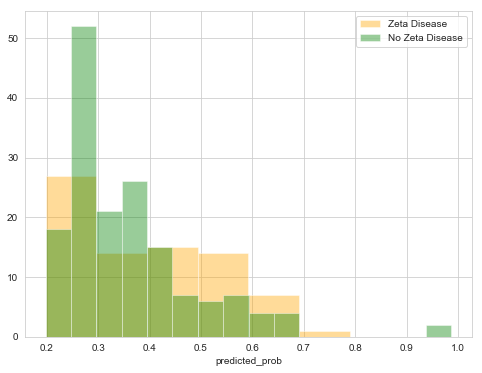

In [62]:
plt.figure(figsize=(8,6))

# plotting distribution of predicted prob values for Zeta Disease

sns.distplot(y_pred_df[y_pred_df.actual==1]['predicted_prob'],kde=False, color='orange',label='Zeta Disease')

# plotting distribution of predicted prob values for No Zeta Disease

sns.distplot(y_pred_df[y_pred_df.actual==0]['predicted_prob'],kde=False, color='g',label='No Zeta Disease')
plt.legend()
plt.show()

In [63]:
# From above,larger the overlap beteen predicted probabilities for different classes, higher will be the misclassifications

In [64]:
# Plotting the ROC and AUC Curve

# ROC Curve can be used to undertsand the overall performance of a logistic regression model and used for model selection. It is 
# a plot between sensitivity (TPR) on vertical axis and 1-specificity (FPR) on the horizontal axis.

In [65]:
def draw_roc(actual, probs):
    # Obtain fpr, tpr,thresholds
    fpr,tpr,thresholds=metrics.roc_curve(actual,probs,drop_intermediate=False)
    auc_score=metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(8,6))
    #plot fpr,tpr values for different threshold values
    plt.plot(fpr, tpr,label='ROC curve(area=%0.2f)'%auc_score)
    #draw a horizontal line connecting the origin and top right most point
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0,1.05])
    #Setting x and y labels
    plt.xlabel('False Positive Rate or [1-True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()
    return fpr,tpr, thresholds

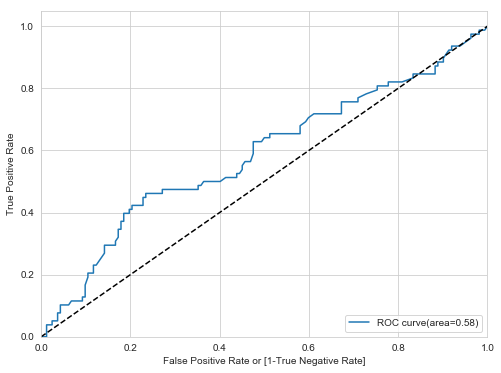

In [66]:
fpr,tpr,thresholds=draw_roc(y_pred_df.actual,y_pred_df.predicted_prob)

In [67]:
# Model with higher AUC is preferred. 
# AUC of atleast 0.7 is required for practical application of the model. AUC greater than 0.9
# is outstanding. 

# In this case, we are getting AUC as 0.58, hence it is not that great.

In [68]:
# Checking AUC Score

auc_score=metrics. roc_auc_score(y_pred_df.actual,y_pred_df.predicted_prob)
round(float(auc_score),2)

0.58

In [69]:
# Finding Optimal Classification Cut Off

# We will select the cut-off prob for which (TPR+TNR-1) is maximum


In [70]:
tpr_fpr=pd.DataFrame({'tpr':tpr, 'fpr':fpr,'thresholds':thresholds})
tpr_fpr['diff']=tpr_fpr.tpr-tpr_fpr.fpr
tpr_fpr.sort_values('diff',ascending = False)[0:10]

,tpr,fpr,thresholds,diff
66,0.461538,0.234568,0.406764,0.226971
67,0.461538,0.240741,0.406299,0.220798
64,0.448718,0.228395,0.411050,0.220323
59,0.423077,0.203704,0.430213,0.219373
68,0.461538,0.246914,0.404256,0.214625
65,0.448718,0.234568,0.408999,0.214150
57,0.410256,0.197531,0.435039,0.212726
54,0.397436,0.185185,0.444727,0.212251
69,0.461538,0.253086,0.402678,0.208452
63,0.435897,0.228395,0.419006,0.207502


In [71]:
# From above,it is observed that the optimal cut off is 0.406. 

#So now we will classify observations above 0.406 as having Zeta Disease and those below 0.406 having No Zeta Disease. 
# We will draw a new Confusion Matrix now

In [72]:
y_pred_df['predicted_new']=y_pred_df.predicted_prob.map(lambda x:1 if x>0.406 else 0)

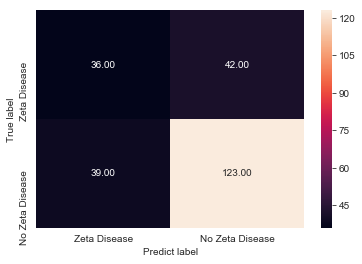

In [73]:
draw_cm(y_pred_df.actual,y_pred_df.predicted_new)

In [74]:
print (metrics.classification_report(y_pred_df.actual,y_pred_df.predicted_new))

              precision    recall  f1-score   support

           0       0.75      0.76      0.75       162
           1       0.48      0.46      0.47        78

   micro avg       0.66      0.66      0.66       240
   macro avg       0.61      0.61      0.61       240
weighted avg       0.66      0.66      0.66       240



In [75]:
# With increase in Cut off prob, the Recall score and f1-score for Zeta Disease has increased compared to above.

In [76]:
# Predicting on New Data - 20 Observations

In [77]:
zeta_disease_new=pd.read_csv(r'C:\Users\NAVEEN ARORA\Take Home Challenge\Data Sets\zeta_predict.csv')

In [78]:
zeta_disease_new

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,24,151,39.5,69,72,1.3968,56,4,NaN
1,27,179,35.5,89,156,1.6608,43,6,NaN
2,34,147,26.9,76,74,1.6958,53,2,NaN
3,35,206,32.4,73,127,1.4608,61,6,NaN
4,60,193,29.8,62,192,1.7798,65,9,NaN
5,45,120,36.5,108,50,1.2978,54,12,NaN
6,20,139,38.2,61,77,1.5818,68,3,NaN
7,23,137,31.2,70,73,1.4168,59,7,NaN
8,36,195,30.5,59,141,1.4498,59,6,NaN
9,19,193,25.8,84,66,1.7938,50,3,NaN


In [79]:
# Since only blood_pressure and years_smoking are significant variables for this case, we will drop remaining other variables 
# as well

zeta_df_new= zeta_disease_new.drop(['age','weight','bmi','insulin_test','liver_stress_test','cardio_stress_test','zeta_disease'],axis=1)

In [80]:
zeta_df_new

,blood_pressure,years_smoking
0,69,4
1,89,6
2,76,2
3,73,6
4,62,9
5,108,12
6,61,3
7,70,7
8,59,6
9,84,3


In [81]:
df=pd.DataFrame(zeta_disease_df, columns=['blood_pressure','years_smoking', 'zeta_disease'])

In [82]:
X=df[['blood_pressure','years_smoking']]

In [83]:
y=df['zeta_disease']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [86]:
from sklearn.linear_model import LogisticRegression
logistic_regression=LogisticRegression()
logistic_regression.fit(X_train, y_train)

C:\Users\NAVEEN ARORA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [87]:
df2=pd.DataFrame(zeta_disease_new, columns=['blood_pressure','years_smoking'])

In [88]:
y_pred=logistic_regression.predict(df2)

In [89]:
print(df2)

    blood_pressure  years_smoking
0               69              4
1               89              6
2               76              2
3               73              6
4               62              9
5              108             12
6               61              3
7               70              7
8               59              6
9               84              3
10              70              7
11              69              3
12              88              4
13              90             10
14              93              5
15              70             12
16              91              3
17              72             13
18              72              4
19             104              2


In [90]:
print(y_pred)

[0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0]


In [91]:
# Above are the Predictions who will be affected by the Zeta Disease. 0= No Zeta Disease,1= Zeta Disease

In [ ]:
#" FINISH"